#   AGENDA BASED SEARCH 

In [ ]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import libraries
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import csv
from csv import reader

In [ ]:
# load csv file 
# load csv file 
with open('tubedata.csv', mode='r') as infile:
    reader = csv.reader(infile)
  # create a dictionary for the csv file and select rows
    tube_dict = {rows[0].replace(" ","").replace('"',""):{rows[1].replace(" ","").replace('"',""):{'weight':float(rows[3].replace(" ","").replace('"',""))}}for rows in reader}

In [ ]:
# show tubedata dictionary

tube_dict

{'Harrow&Wealdstone': {'Kenton': {'weight': 3.0}},
 'Kenton': {'SouthKenton': {'weight': 2.0}},
 'SouthKenton': {'NorthWembley': {'weight': 2.0}},
 'NorthWembley': {'WembleyCentral': {'weight': 2.0}},
 'WembleyCentral': {'StonebridgePark': {'weight': 3.0}},
 'StonebridgePark': {'Harlesden': {'weight': 2.0}},
 'Harlesden': {'WillesdenJunction': {'weight': 2.0}},
 'WillesdenJunction': {'KensalGreen': {'weight': 3.0}},
 'KensalGreen': {"Queen'sPark": {'weight': 3.0}},
 "Queen'sPark": {'KilburnPark': {'weight': 2.0}},
 'KilburnPark': {'MaidaVale': {'weight': 2.0}},
 'MaidaVale': {'WarwickAvenue': {'weight': 1.0}},
 'WarwickAvenue': {'Paddington': {'weight': 2.0}},
 'Paddington': {'EdgwareRoad': {'weight': 4.0}},
 'EdgwareRoad': {'BakerStreet': {'weight': 3.0}},
 'Marylebone': {'BakerStreet': {'weight': 1.0}},
 'BakerStreet': {'FinchleyRoad': {'weight': 6.0}},
 "Regent'sPark": {'OxfordCircus': {'weight': 2.0}},
 'OxfordCircus': {'GreenPark': {'weight': 2.0}},
 'PiccadillyCircus': {'GreenPar

In [ ]:
tube_dict = nx.Graph(tube_dict)
tube_dict

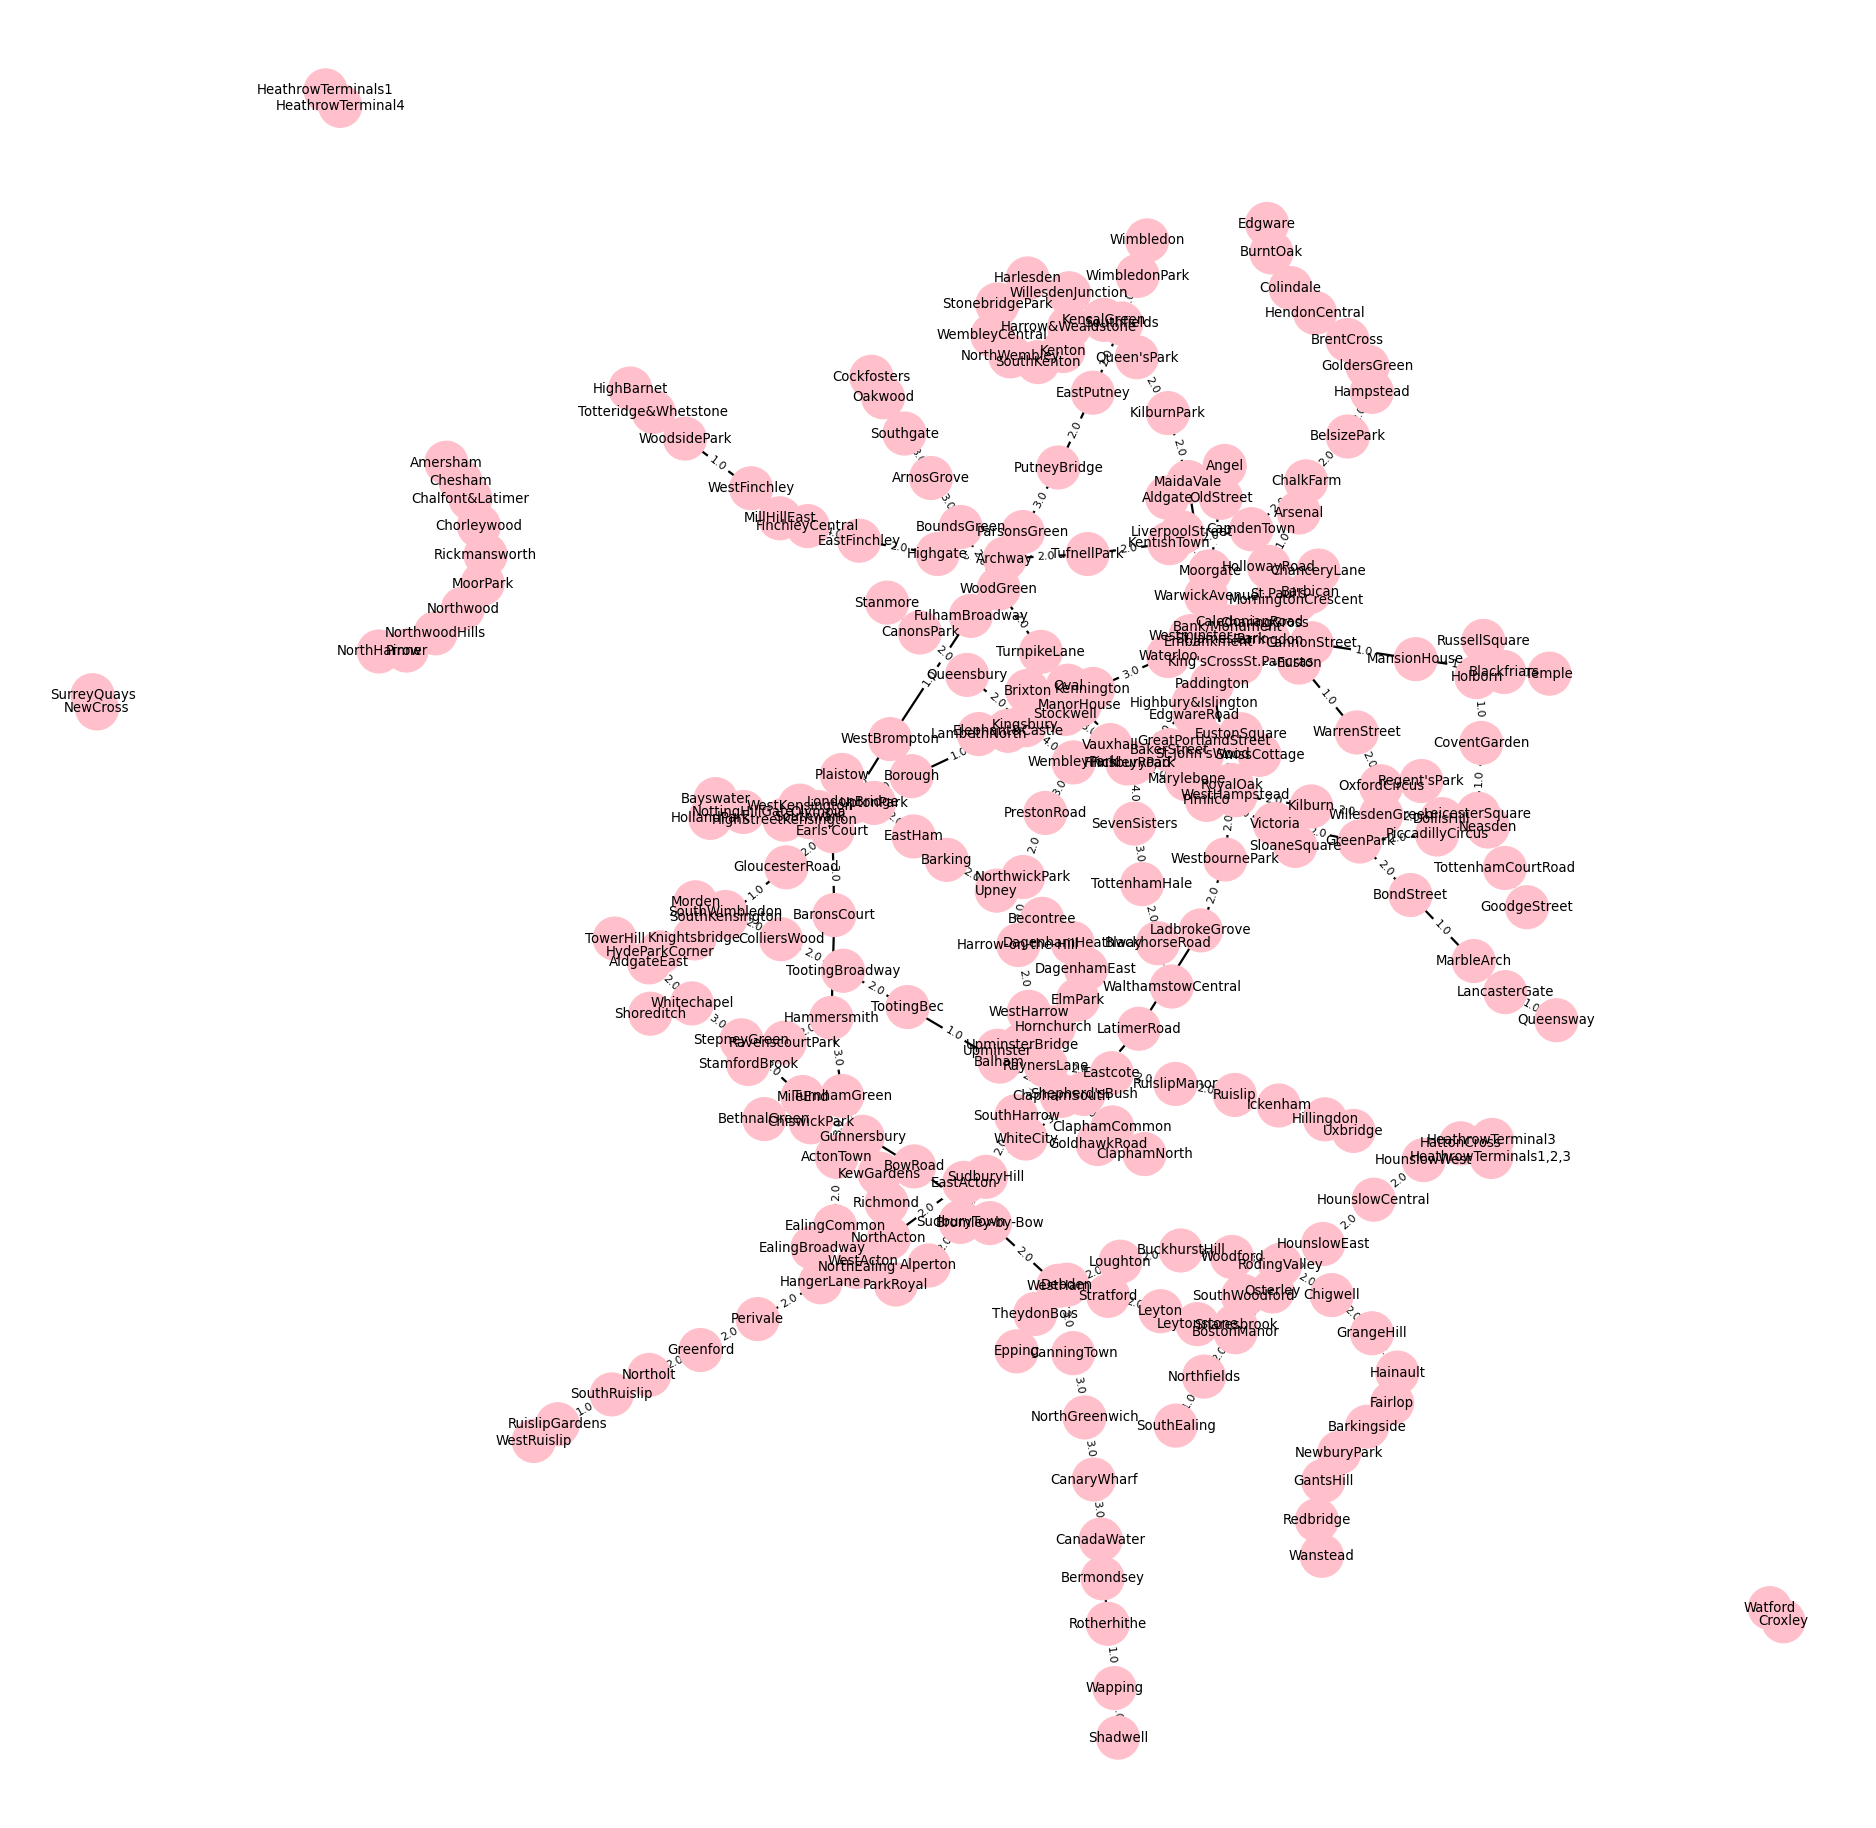

In [ ]:
# Show tube nxgraph displaying weights. 
# reference: AI lab3 solutions 
def tubedata_graph(networkx_graph, node_size, font_size, fig_size):
  # Allocate the given fig_size in order to have space for each node
  plt.figure(num=None, figsize=fig_size, dpi=80)
  plt.axis('off')
  # Compute the position of each vertex in order to display it nicely
  nodes_position = nx.spring_layout(networkx_graph) 
  # You can change the different layouts depending on your graph
  # Extract the weights corresponding to each edge in the graph
  edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
  # Draw the nodes (you can change the color)
  nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,  
                         node_color = ["pink"]*networkx_graph.number_of_nodes())
  # Draw only the edges
  nx.draw_networkx_edges(networkx_graph, nodes_position, 
                         edgelist=list(networkx_graph.edges), width=2)
  # Add the weights
  nx.draw_networkx_edge_labels(networkx_graph, nodes_position, 
                               edge_labels = edges_weights)
  # Add the labels of the nodes
  nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size, 
                          font_family='sans-serif')
  plt.axis('off')
  plt.show()
    
#show tube nxgraph 
tubedata_graph(tube_dict, 1500, 12, (30,30))

##  Depth First Search (DFS)

In [ ]:
# this fuunction implements DFS
# reference: AI lab3 solutions

def construct_path_from_root(node, root):
    """the non-recursive way!"""
#     print(node)
    path_from_root = [node['label']]
    while node['parent']:
        node = node['parent']
        path_from_root = [node['label']] + path_from_root
    return path_from_root


def dfs_tube(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    """the no-oop way!"""
    
    frontier = [{'label':initial, 'parent':None}]  
    explored = {initial}
    number_of_explored_nodes = 1 

    while frontier:
        node = frontier.pop() # pop from the right of the list
        number_of_explored_nodes += 1
        if node['label']==goal:
            if compute_exploration_cost:
                print('number of explorations = {}'.format(number_of_explored_nodes))
            return node

        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])
        for child_label in neighbours:
#             print(node)
#             print(child_label)
            child = {'label':child_label, 'parent':node}
            if child_label not in explored:
                frontier.append(child) # added to the right of the list, so it is a LIFO
                explored.add(child_label)      
    return explored

In [ ]:
# show route from euston to victoria (DFS)

example1 = dfs_tube(tube_dict, 'Euston', 'Victoria', True)
construct_path_from_root(example1, 'Euston')

number of explorations = 6


['Euston', 'WarrenStreet', 'OxfordCircus', 'GreenPark', 'Victoria']

In [ ]:
# New Cross Gate to Stepeny Green the route is not found. 


# show route from ealing broadway to south kensington (DFS)
example3 = dfs_tube(tube_dict, 'EalingBroadway', 'SouthKensington', True)
construct_path_from_root(example3, 'EalingBroadway')

number of explorations = 24


['EalingBroadway',
 'EalingCommon',
 'ActonTown',
 'TurnhamGreen',
 'Hammersmith',
 'BaronsCourt',
 "Earls'Court",
 'GloucesterRoad',
 'SouthKensington']

In [ ]:
#show route from canada water to stratford (DFS)

example3 = dfs_tube(tube_dict, 'CanadaWater', 'Stratford', True)
construct_path_from_root(example3, 'CanadaWater')

number of explorations = 8


['CanadaWater',
 'CanaryWharf',
 'NorthGreenwich',
 'CanningTown',
 'WestHam',
 'Stratford']

In [ ]:
# show route from baker street to wembely park (DFS)

example4 = dfs_tube(tube_dict, 'BakerStreet', 'WembleyPark', True)
construct_path_from_root(example4, 'BakerStreet')

number of explorations = 8


['BakerStreet', 'FinchleyRoad', 'WembleyPark']

In [ ]:
# show route from upney to plaistow (DFS)

example5 = dfs_tube(tube_dict, 'Upney', 'Plaistow', True)
construct_path_from_root(example5, 'Upney')

number of explorations = 13


['Upney', 'Barking', 'EastHam', 'UptonPark', 'Plaistow']

## Breadth First Search (BFS)

In [ ]:
# this function implments BFS
# reference: AI lab3 solutions

def bfs_tube(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    
    if initial == goal: # just in case, because now we are checking the children
        return None
    
    number_of_explored_nodes = 1    
    frontier = [{'label':initial, 'parent':None}]  
    # FIFO queue should NOT be implemented with a list, this is slow! better to use deque
    explored = {initial}
    
    while frontier:
        node = frontier.pop() # pop from the right of the list
        
        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])

        for child_label in neighbours:
            child = {'label':child_label, 'parent':node}
            if child_label==goal:
                if compute_exploration_cost:
                    print('number of explorations = {}'.format(number_of_explored_nodes))
                return child
 
            if child_label not in explored:
                frontier = [child] + frontier # added to the left of the list, so a FIFO!
                number_of_explored_nodes += 1
                explored.add(child_label)
            
    return explored

In [ ]:
# show route from euston to victoria (BFS)

example15 = bfs_tube(tube_dict, 'Euston', 'Victoria', True)
construct_path_from_root(example15, 'Euston')

number of explorations = 23


['Euston', 'WarrenStreet', 'OxfordCircus', 'GreenPark', 'Victoria']

In [ ]:
# show route from upney to plaistow  (BFS)

example6 = bfs_tube(tube_dict, 'Upney', 'Plaistow', True)
construct_path_from_root(example6, 'Upney')

number of explorations = 7


['Upney', 'Barking', 'EastHam', 'UptonPark', 'Plaistow']

In [ ]:
# show route from canada water to stratford (BFS)

example7 = bfs_tube(tube_dict, 'CanadaWater', 'Stratford', True)
construct_path_from_root(example7, 'CanadaWater')

number of explorations = 10


['CanadaWater',
 'CanaryWharf',
 'NorthGreenwich',
 'CanningTown',
 'WestHam',
 'Stratford']

In [ ]:
# show route from ealing broadway to southe kensington (BFS)

example8 = bfs_tube(tube_dict, 'EalingBroadway', 'SouthKensington', True)
construct_path_from_root(example8, 'EalingBroadway')

number of explorations = 25


['EalingBroadway',
 'EalingCommon',
 'ActonTown',
 'TurnhamGreen',
 'Hammersmith',
 'BaronsCourt',
 "Earls'Court",
 'GloucesterRoad',
 'SouthKensington']

In [ ]:
# show route from baker street to wembley park (BFS)

example9 = bfs_tube(tube_dict, 'BakerStreet', 'WembleyPark', True)
construct_path_from_root(example9, 'BakerStreet')

number of explorations = 8


['BakerStreet', 'FinchleyRoad', 'WembleyPark']

## Uniform Cost Search (UCS)

In [ ]:
# import priority queue & heapq

from queue import PriorityQueue
import heapq

In [ ]:
# this function implements ucs 

def ucs_tube(graph, origin, goal):
    queue = []
    tracker = {}
    
    node = (0, origin, [origin])
    # the dictionary tracks the elements inside frontier(queue)
    tracker[node[1]] = [node[0], node[2]]
    #adds the node in the queue
    heapq.heappush(queue, node)
    explored = set()
    while queue:
        if len(queue) == 0:
            return None
        #pops out the element that has the lowest costing path from the queue
        node = heapq.heappop(queue)
        #element is removed from the dictionary
        del tracker[node[1]]
        # Check if the solution has been found
        if node[1] == goal:
            return node
        explored.add(node[1])
        #creates a list with all the child nodes 
        neighbours = list(graph.neighbors(node[1]))
        path = node[2]
        for child in neighbours:
            path.append(child)
            average_time = graph.get_edge_data(node[1], child)["weight"]
            #makes a child node that will be placed in the frontier 
            child_node = (node[0] + average_time, child, path)
            #this sees if the child node is not yet explored and not in the frontier
            if child not in explored and child not in tracker:
                heapq.heappush(queue, child_node)
                tracker[child] = [child_node[0], child_node[2]]
            elif child in tracker:
                if child_node[0] < tracker[child][0]:
                    node_to_remove = (tracker[child][0], child, tracker[child][1])
                    queue.remove(node_to_remove)
                    heapq.heapify(queue)
                    del tracker[child]

                    heapq.heappush(queue, child_node)
                    tracker[child] = [child_node[0], child_node[2]]
            path = path[:-1]

In [ ]:
#route from ealing broadway to south kensington(UCS)

example10 = ucs_tube(tube_dict, 'EalingBroadway', 'SouthKensington')

example10

(20.0,
 'SouthKensington',
 ['EalingBroadway',
  'EalingCommon',
  'ActonTown',
  'TurnhamGreen',
  'Hammersmith',
  'BaronsCourt',
  "Earls'Court",
  'GloucesterRoad',
  'SouthKensington'])

In [ ]:
#route from euston to victoria(UCS)

example11 = ucs_tube(tube_dict, 'Euston', 'Victoria')

example11

(7.0,
 'Victoria',
 ['Euston', 'WarrenStreet', 'OxfordCircus', 'GreenPark', 'Victoria'])

In [ ]:
# route from canada water to stratford (UCS)

example12 = ucs_tube(tube_dict, 'CanadaWater', 'Stratford')

example12

(15.0,
 'Stratford',
 ['CanadaWater',
  'CanaryWharf',
  'NorthGreenwich',
  'CanningTown',
  'WestHam',
  'Stratford'])

In [ ]:
#route from baker street and wembley park (UCS)

example13 = ucs_tube(tube_dict, 'BakerStreet', 'WembleyPark')

example13

(13.0, 'WembleyPark', ['BakerStreet', 'FinchleyRoad', 'WembleyPark'])

In [ ]:
# route from upney to plaistow (UCS)

example14 = ucs_tube(tube_dict, 'Upney', 'Plaistow')

example14

(10.0, 'Plaistow', ['Upney', 'Barking', 'EastHam', 'UptonPark', 'Plaistow'])

## Cost Function 


After many attempts, I tried to improve the cost function by adding different parameters. However, I faced several problems and setbacks. If I had more time I would altered the dictionary and used the tube line to see if the cost function improves. 

In [ ]:

def new_ucs_cost(graph, origin, goal):
    queue = []
    tracker = {}
    
    node = (0, origin, [origin])
    # the dictionary tracks the elements inside frontier(queue)
    tracker[node[1]] = [node[0], node[2]]
    #adds the node in the queue
    heapq.heappush(queue, node)
    explored = set()
    while queue:
        if len(queue) == 0:
            return None
        #pops out the element that has the lowest costing path from the queue
        node = heapq.heappop(queue)
        #element is removed from the dictionary
        del tracker[node[1]]
        # Check if the solution has been found
        if node[1] == goal:
            return node
        explored.add(node[1])
        #creates a list with all the child nodes 
        neighbours = list(graph.neighbors(node[1]))
        path = node[2]
        for child in neighbours:
            path.append(child)
            average_time = graph.get_edge_data(node[1], child)["weight"]
            #makes a child node that will be placed in the frontier 
            child_node = (node[0] + average_time, child, path)
            #this sees if the child node is not yet explored and not in the frontier
            if child not in explored and child not in tracker:
                heapq.heappush(queue, child_node)
                tracker[child] = [child_node[0], child_node[2]]
            elif child in tracker:
                if child_node[0] < tracker[child][0]:
                    node_to_remove = (tracker[child][0], child, tracker[child][1])
                    queue.remove(node_to_remove)
                    heapq.heapify(queue)
                    del tracker[child]

                    heapq.heappush(queue, child_node)
                    tracker[child] = [child_node[0], child_node[2]]
            path = path[:-1]

In [ ]:
# new cost 
example20 = new_ucs_cost(tube_dict, 'Euston', 'Victoria')
example20

(7.0,
 'Victoria',
 ['Euston', 'WarrenStreet', 'OxfordCircus', 'GreenPark', 'Victoria'])

In [ ]:
# new cost 
example21 = new_ucs_cost(tube_dict, 'EalingBroadway', 'SouthKensington')
example21

(20.0,
 'SouthKensington',
 ['EalingBroadway',
  'EalingCommon',
  'ActonTown',
  'TurnhamGreen',
  'Hammersmith',
  'BaronsCourt',
  "Earls'Court",
  'GloucesterRoad',
  'SouthKensington'])

In [ ]:
#new cost 
example22 = new_ucs_cost(tube_dict, 'CanadaWater', 'Stratford')
example22

(15.0,
 'Stratford',
 ['CanadaWater',
  'CanaryWharf',
  'NorthGreenwich',
  'CanningTown',
  'WestHam',
  'Stratford'])

In [ ]:
#new cost 
example23 = new_ucs_cost(tube_dict, 'BakerStreet', 'WembleyPark')
example23

(13.0, 'WembleyPark', ['BakerStreet', 'FinchleyRoad', 'WembleyPark'])

In [ ]:

example24 = new_ucs_cost(tube_dict, 'Upney', 'Plaistow')
example24

(10.0, 'Plaistow', ['Upney', 'Barking', 'EastHam', 'UptonPark', 'Plaistow'])

## Heuristic Search

After many attempts, I tired implement the Astar method but I was facing several challenges and setbacks. If I had more time I would have implemented the AI lab 4 code. I would have also altered the code so it gives the desired output. 

In [ ]:
from queue import PriorityQueue

def Astar(graph, origin, goal):
    admissible_heuristics = {} # Will save the values of h so i don't need to calculate multiple times for every node
    h = heuristic(origin)
    admissible_heuristics[origin] = h
    visited_nodes = {} # This will contain the data of how to get to any node
    visited_nodes[origin] = (h, [origin]) # I add the data for the origin node: "Travel cost + heuristic", "Path to get there" and "Admissible Heuristic"

    paths_to_explore = PriorityQueue()
    paths_to_explore.put((h, [origin], 0)) # Add the origin node to paths to explore, also add cost without h
	# I add the total cost, as well as the path to get there (they will be sorted automatically)

    while not paths_to_explore.empty(): # While there are still paths to explore
        # Pop elemenet with lower path cost in the queue
        _, path, total_cost = paths_to_explore.get()
        current_node = path[-1]
        neighbors = graph.neighbors(current_node) # I get all the neighbors of the current path
		
        for neighbor in neighbors:
            edge_data = graph.get_edge_data(path[-1], neighbor)
            if "weight" in edge_data:
                cost_to_neighbor = edge_data["weight"] # If the graph has weights
            else:
                cost_to_neighbor = 1 # If the graph does not have weights I use 1

            if neighbor in admissible_heuristics:
                h = admissible_heuristics[neighbor]
            else:
                h = heuristic(neighbor)
                admissible_heuristics[neighbor] = h

            new_cost = total_cost + cost_to_neighbor
            new_cost_plus_h = new_cost + h
            if (neighbor not in visited_nodes) or (visited_nodes[neighbor][0]>new_cost_plus_h): # If this node was never explored, or the cost to get there is better than te previous ones
                next_node = (new_cost_plus_h, path+[neighbor], new_cost)
                visited_nodes[neighbor] = next_node # Update the node with best value
                paths_to_explore.put(next_node) # Also will add it as a possible path to explore

    return visited_nodes[goal] # I will return the goal information, it will have both the total cost and the path